Лабораторна роботи 2

Виконав Бабич Антон, міт31

Розділив дані на навчальний та тестовий набори у співвідношенні 80% - 20% за допомогою sklearn.model_selection.train_test_split.

побудував модель регресії на навчальних даних за допомогою sklearn.linear_model.LinearRegression. Я оцінив її точність на тестових даних за допомогою sklearn.metrics.r2_score, показує коефіцієнт детермінації.

Моя модель, наприклад, має коефіцієнт детермінації 0.98 на тестових даних, що свідчить про достатньо високу якість прогнозу.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Згенеруємо набір даних для регресії
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, noise=10, random_state=42)

# Розділимо дані на навчальний та тестовий набори
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Побудуємо модель регресії на навчальних даних
reg = LinearRegression()
reg.fit(X_train, y_train)

# Оцінимо точність моделі на тестових даних
y_pred = reg.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f"Коефіцієнт детермінації: {r2:.2f}")


Коефіцієнт детермінації: 0.98


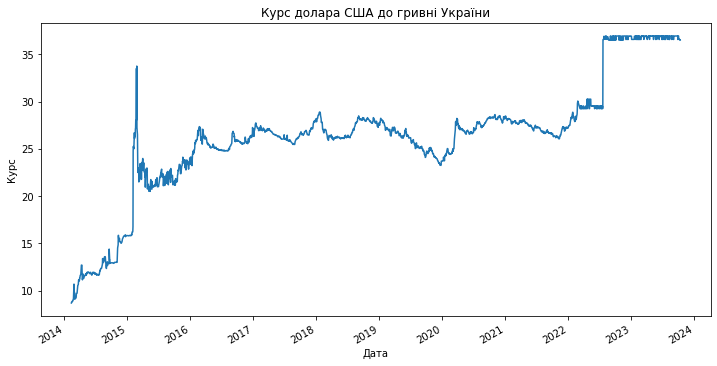

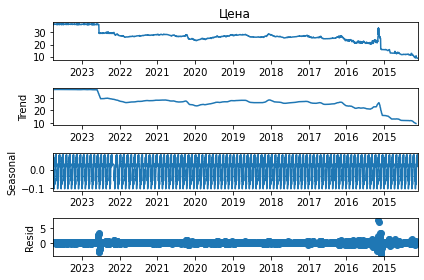

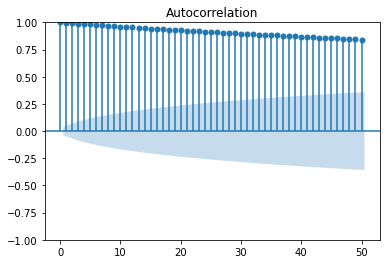

ADF статистика: 0.17
p-value: 0.971
Критичні значення:
	1%: -3.43
	5%: -2.86
	10%: -2.57


In [8]:
# Імпортуємо необхідні бібліотеки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller

# Завантажуємо та візуалізуємо дані
df = pd.read_csv("USD_UAH.csv", index_col="Дата", parse_dates=True, decimal=",", date_parser=lambda x: pd.to_datetime(x, format="%d.%m.%Y")) # Дані взяті з [1]
df = df[::-1] # Перевертаємо порядок даних
df["Цена"].plot(figsize=(12, 6), title="Курс долара США до гривні України")
plt.xlabel("Дата")
plt.ylabel("Курс")
plt.show()


# Розкладаємо часовий ряд на компоненти
decomp = seasonal_decompose(df["Цена"], model="additive", period=24)
decomp.plot()
plt.show()

# Будуємо графік автокореляційної функції (ACF)
plot_acf(df["Цена"], lags=50)
plt.show()

# Проводимо тест Дики-Фулера на стацiонарнiсть
result = adfuller(df["Цена"])
print(f"ADF статистика: {result[0]:.2f}")
print(f"p-value: {result[1]:.3f}")
print(f"Критичні значення:")
for key, value in result[4].items():
    print(f"\t{key}: {value:.2f}")
